In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Description

In this notebook, we will perform the descriptive analysis outlined in Team Assignment 2-a. Before analyzing patterns across different time scales (days, weeks, and seasons), we will first take a brief look at the dataset to understand if, for example, there are multiple seasons represented.

#### Tasks
- [ ] Analyze seasonal patterns
- [ ] Analyze weekly patterns
- [ ] Analyze daily patterns

In [22]:
df = pd.read_feather("full_charging_data")
df.head()

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,...,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,connectionTimespan,connectionMonth,connectionWeekdayName,isWeekend
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,...,25.0,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT",0 days 06:02:21,1,Thursday,False
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,...,70.0,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT",0 days 09:01:31,1,Thursday,False
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,...,8.0,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT",0 days 10:42:47,1,Thursday,False
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,...,8.0,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT",0 days 02:38:41,1,Thursday,False
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,...,16.0,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT",0 days 08:08:39,1,Thursday,False


In [32]:
df["connectionTime"].describe()

count                                  66450
mean     2019-08-06 20:19:01.997832704+00:00
min                2018-04-25 11:08:04+00:00
25%         2018-11-13 08:28:56.500000+00:00
50%         2019-06-14 14:17:45.500000+00:00
75%         2020-01-08 00:31:54.500000+00:00
max                2021-09-14 05:43:39+00:00
Name: connectionTime, dtype: object

Now we know that the data was collected over four years, from 2018-04-25 to 2021-09-14. This is important for the seasonal pattern analysis, as some seasonal variations might not only be due to the typical changes between winter and summer but could also be influenced by factors such as global warming.

In [34]:
df["connectionYear"] = df["connectionTime"].dt.year
df["connectionYear"].value_counts().sort_index()

connectionYear
2018    20067
2019    29432
2020     8041
2021     8910
Name: count, dtype: int64

It appears that most of the data we have is from 2018 and 2019. This could be due to several reasons:

1. People may have used these charging hubs more frequently in 2018 and 2019 (possibly due to COVID-19). To verify this, we would need data from across the USA to see if our dataset accurately represents the population (we should still verify this, but in the meantime, we’ll proceed with the analysis).
2. We might have changed our data collection methods (e.g., using samples instead of a complete dataset, or other adjustments).

This is important to consider when analyzing seasonality, as the results may overlook patterns in the “newer” data.

## Seasonal Patterns

In this section, we analyze the patterns that occur across different seasons. First, we’ll examine monthly changes to gain a better understanding of the data. Then, we’ll look at how the figures change over traditional seasons (spring, summer, fall, and winter).

###  Insights and Observed Patterns
- Monthly changes in the data suggest that colder months correlate with different charging behaviors.
- 2020 & 2021 are infuenced by Covid-19 and the pandemic
- in 2021 there are measurement errors from 2020-08-04 to 2020-11-17
- 2018 the measurement started (and maybe the programm itself)
- generally warmer months have in general more records of charges




In [55]:
# Function to plot a histogram of connections by month with centered month labels
def plot_hist_all_years(dfs_by_year: dict, title: str) -> None:
    num_years = len(dfs_by_year)
    fig, axes = plt.subplots(1, num_years, figsize=(15, 5), sharey=True)
    fig.suptitle(title)

    for i, (year, season_df) in enumerate(dfs_by_year.items()):
        # Determine the minimum and maximum month numbers present in the DataFrame
        min_month = season_df['connectionMonth'].min()
        max_month = season_df['connectionMonth'].max()

        # Calculate the number of bins dynamically based on the range of months
        month_bins = max_month - min_month + 1

        # Plotting histogram in each subplot
        counts, bins, patches = axes[i].hist(
            season_df['connectionMonth'], bins=month_bins, edgecolor='black',
            rwidth=0.8, range=(min_month - 0.5, max_month + 0.5)
        )

        axes[i].set_title(f"Year {year}")
        axes[i].set_xlabel('Month')
        if i == 0:
            axes[i].set_ylabel('Frequency')

        # Set x-ticks centered under each bar
        axes[i].set_xticks(np.arange(min_month, max_month + 1))
        axes[i].set_xticklabels(
            ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][min_month - 1:max_month]
        )

        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
    plt.show()


def plot_hist_year(season_df: pd.DataFrame, title: str) -> None:
    # Determine the minimum and maximum month numbers present in the DataFrame
    min_month = season_df['connectionMonth'].min()
    max_month = season_df['connectionMonth'].max()

    # Calculate the number of bins dynamically based on the range of months
    month_bins = max_month - min_month + 1

    # Plotting histogram with the specific range of months
    plt.figure(figsize=(10, 6))
    counts, bins, patches = plt.hist(
        season_df['connectionMonth'], bins=month_bins, edgecolor='black',
        rwidth=0.8, range=(min_month - 0.5, max_month + 0.5)
    )

    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Frequency')

    # Set x-ticks centered under each bar
    plt.xticks(
        ticks=np.arange(min_month, max_month + 1),
        labels=[
                   'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
               ][min_month - 1:max_month]
    )

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

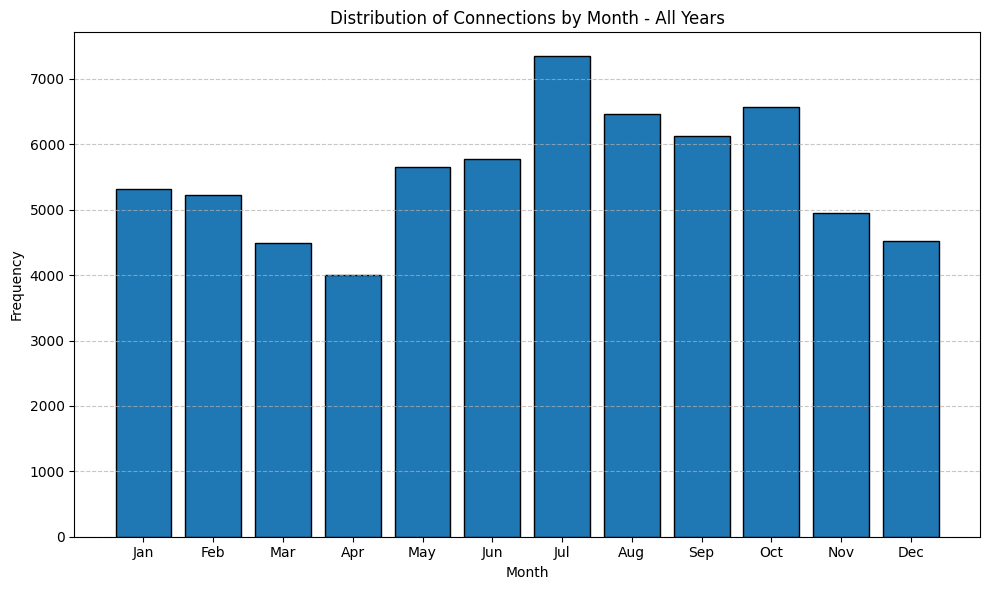

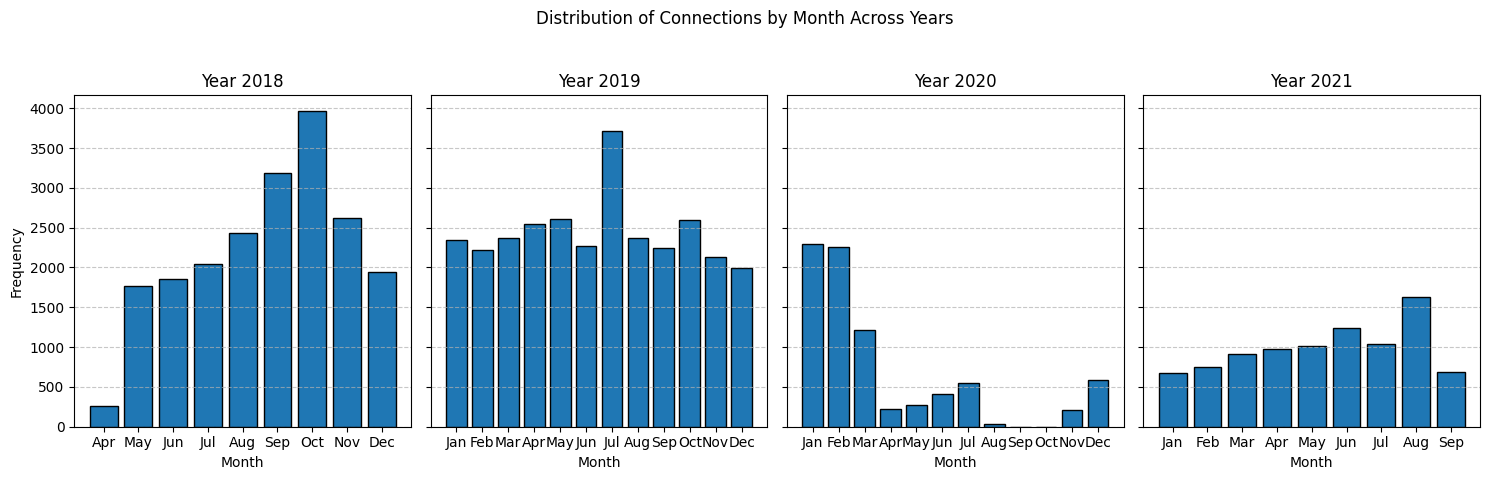

In [61]:
# Plot a histogram of 'connectionMonth' to visualize charging frequency by month
# This can reveal seasonal trends, e.g., higher charges in summer months compared to winter months
# Note: More charges in summer does not necessarily mean more kilowatt usage

years = [df["connectionYear"].min()+ year for year in range(df["connectionYear"].max() - df["connectionYear"].min() + 1)]
dfs_by_year = {year: df[df["connectionYear"] == year] for year in years}
plot_hist_year(df, 'Distribution of Connections by Month - All Years')
plot_hist_all_years(dfs_by_year, "Distribution of Connections by Month Across Years")

What we can see here is that there are acutal diffrences between the year. While the corona times are a very special case this should be included into the model (a funny pandemic boolean for these times or something similar)

https://www.nbclosangeles.com/news/coronavirus/2020-2021-california-coronavirus-pandemic-timeline-key-events/2334100/

**IF THE DATA IS FROM GERMANY** we can take a look at the german news articels and see that a lockdowns were inplace March,22 2020 - May, 4 2020,  on which fits to our data. The first lockdown was the stricest and the people may have adjusted so it is also not a suprise that the second and third lockdown in November 2, 2020 and January 6, 2021 didn't have such a big impact on our data.

source: https://www.dw.com/en/covid-how-germany-battles-the-pandemic-a-chronology/a-58026877

In [95]:
dfs_by_year.get(2020)["connectionMonth"].value_counts().sort_index()

connectionMonth
1     2291
2     2258
3     1216
4      225
5      268
6      411
7      549
8       33
11     206
12     584
Name: count, dtype: int64

The Big drop in records from September to October (Not a single one) is most likely due to an error as it is very unlikely to just drop to Zero in the real world without any indication. Given this context also the low numbers in August seem a bit strage as if there where failures started acutally in August and just got fixed somewhere in Novemer

In [98]:
august_data_2020 = dfs_by_year.get(2020)[dfs_by_year.get(2020)["connectionMonth"] == 8]
set(august_data_2020['connectionTime'].dt.day)

{1, 2, 3}

In [99]:
november_data_2020 = dfs_by_year.get(2020)[dfs_by_year.get(2020)["connectionMonth"] == 11]
set(november_data_2020['connectionTime'].dt.day)

{18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30}

The metrics for August and Novemer support the assumptions that is seems that there was an measurement error from 2020-08-04 - 2020-11-17.

Overall from the Yeary Analysis we know that
1. We need to look at the years spereratly
2. 

For 2018 It seemt that the technology is new and thus the rising records can be due to its "hype". For 2019 everything seems quite "normal". For 2020 we have corona and mearsurement errors and for 2021 we still at least have corona.

In [100]:
example_year = dfs_by_year.get(2019)
example_year.head()

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,...,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,connectionTimespan,connectionMonth,connectionWeekdayName,isWeekend,connectionYear
5573,5d2fbdd3f9af8b4d0dd0d54f,2019-07-02 00:32:46+00:00,2019-07-02 02:34:56+00:00,2019-07-02 01:46:09+00:00,2.463,1_1_193_827_2019-07-02 00:32:45.820079,1,AG-1F02,1-1-193-827,America/Los_Angeles,...,20.0,90.0,"Tue, 02 Jul 2019 00:32:53 GMT",True,"Tue, 02 Jul 2019 02:02:46 GMT",0 days 02:02:10,7,Tuesday,False,2019
5574,5d310f54f9af8b52adda3e20,2019-07-02 12:15:28+00:00,2019-07-02 16:01:01+00:00,2019-07-02 16:01:38+00:00,12.891,1_1_194_818_2019-07-02 12:15:28.503952,1,AG-1F14,1-1-194-818,America/Los_Angeles,...,70.0,332.0,"Tue, 02 Jul 2019 12:18:12 GMT",True,"Tue, 02 Jul 2019 17:47:28 GMT",0 days 03:45:33,7,Tuesday,False,2019
5575,5d310f54f9af8b52adda3e21,2019-07-02 12:42:49+00:00,2019-07-02 19:34:19+00:00,2019-07-02 16:21:21+00:00,13.734,1_1_178_828_2019-07-02 12:42:48.733464,1,AG-1F10,1-1-178-828,America/Los_Angeles,...,50.0,186.0,"Tue, 02 Jul 2019 12:43:19 GMT",True,"Tue, 02 Jul 2019 15:48:49 GMT",0 days 06:51:30,7,Tuesday,False,2019
5576,5d310f54f9af8b52adda3e22,2019-07-02 12:44:46+00:00,2019-07-02 22:33:29+00:00,2019-07-02 16:28:09+00:00,10.619,1_1_178_823_2019-07-02 12:44:45.734064,1,AG-1F08,1-1-178-823,America/Los_Angeles,...,40.0,581.0,"Tue, 02 Jul 2019 12:45:09 GMT",True,"Tue, 02 Jul 2019 22:25:46 GMT",0 days 09:48:43,7,Tuesday,False,2019
5577,5d310f54f9af8b52adda3e23,2019-07-02 12:52:53+00:00,2019-07-02 19:21:25+00:00,2019-07-02 17:55:13+00:00,19.079,1_1_179_799_2019-07-02 12:52:52.691064,1,AG-3F25,1-1-179-799,America/Los_Angeles,...,260.0,534.0,"Tue, 02 Jul 2019 12:53:40 GMT",True,"Tue, 02 Jul 2019 21:46:53 GMT",0 days 06:28:32,7,Tuesday,False,2019


### Seasonal Patterns

When talking about seasonal patterns it is important to also understand why one wants to talk about them. The calendaric seasons are well suited for comparing different seasons if it is important that they have all equivilant timespans but when one wants to talk about seasons because one wants to know what people behave when its warm (Summerlike) or cold (winterlike) the meteorological seasons may can be used to create more informative insights. As it is not specified which one should be done in this tasks (and also because this may also is important for the predection model task we first will use the calendar seasons to describe the data and afterwards the meteorologial once in Burbank. For this the following data is used:

https://www.timeanddate.com/calendar/seasons.html?year=2000&n=796 / burbank_seasons.feather

In [ ]:
1. the monthly
2. afterwards we look if we can aggretage after the "real" metherologic seasons as they are more expressive then it comes to finding diffrences (maybe we also use the calendar and comrapre them) 